In [1]:
import keras
import pandas as pd
import numpy as np
from keras import layers
from keras import models
from keras import regularizers

Using TensorFlow backend.


In [0]:
from keras.datasets import reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 0s 0us/step


In [4]:
len(train_data)

8982

In [5]:
test_labels[0]

3

In [6]:
train_data.shape

(8982,)

In [7]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [8]:
word_to_id = keras.datasets.reuters.get_word_index()
word_to_id = {key:(value + 3) for key,value in word_to_id.items()}
word_to_id["Start: "] = 1
word_to_id["<UNK>"] = 2

id_to_word = {value:key for key,value in word_to_id.items()}
decoded_review=(' '.join(id_to_word[id] for id in train_data[0] ))

557056/550378 [==============================] - 0s 0us/step


In [9]:
decoded_review

'Start:  <UNK> <UNK> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [10]:
train_labels[0]

3

In [11]:
np.zeros((8982,10000))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [0]:
train_data = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)

In [14]:
train_data.shape

(8982, 10000)

In [15]:
test_data.shape

(2246, 10000)

In [0]:
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [17]:
test_labels[30].shape

(46,)

In [18]:
train_labels.shape

(8982, 46)

In [19]:
test_labels.shape

(2246, 46)

In [0]:
# model = models.Sequential()
# model.add(layers.Dense(64, activation = "relu", input_shape=(10000,), kernel_regularizer=regularizers.l2(0.0001) ))
# model.add(layers.Dropout(0.1))
# model.add(layers.Dense(64, activation = "relu", kernel_regularizer=regularizers.l2(0.00001) ))
# model.add(layers.Dense(46, activation = "softmax", kernel_regularizer=regularizers.l2(0.00001) ))

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation = "relu", input_shape=(10000,) ))
model.add(layers.Dropout(0.08))
model.add(layers.Dense(64, activation = "relu" ))
model.add(layers.Dense(46, activation = "softmax" ))

In [0]:
model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [0]:
x_val = train_data[:1000]
partial_x_train = train_data[1000:]

y_val = train_labels[:1000]
partial_y_train = train_labels[1000:]

In [24]:
model.fit(train_data, train_labels, epochs = 9, batch_size = 512)

Epoch 1/9
8982/8982 [==============================] - 2s 224us/step - loss: 2.4509 - acc: 0.5474
Epoch 2/9
8982/8982 [==============================] - 1s 137us/step - loss: 1.3321 - acc: 0.7147
Epoch 3/9
8982/8982 [==============================] - 1s 139us/step - loss: 1.0251 - acc: 0.7761
Epoch 4/9
8982/8982 [==============================] - 1s 137us/step - loss: 0.8223 - acc: 0.8177
Epoch 5/9
8982/8982 [==============================] - 1s 138us/step - loss: 0.6698 - acc: 0.8528
Epoch 6/9
8982/8982 [==============================] - 1s 138us/step - loss: 0.5511 - acc: 0.8755
Epoch 7/9
8982/8982 [==============================] - 1s 139us/step - loss: 0.4509 - acc: 0.9027
Epoch 8/9
8982/8982 [==============================] - 1s 137us/step - loss: 0.3797 - acc: 0.9175
Epoch 9/9
8982/8982 [==============================] - 1s 138us/step - loss: 0.3214 - acc: 0.9289


In [25]:
loss, acc = model.evaluate(test_data,test_labels)

2246/2246 [==============================] - 0s 125us/step


In [26]:
acc

0.7943009795191451

In [0]:
import matplotlib.pyplot as plt
epochs = range(1, len(history.history['acc']) + 1)
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label = "Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.show()

In [0]:
model.fit(train_data, train_labels, epochs = 9, batch_size = 512)

NameError: ignored

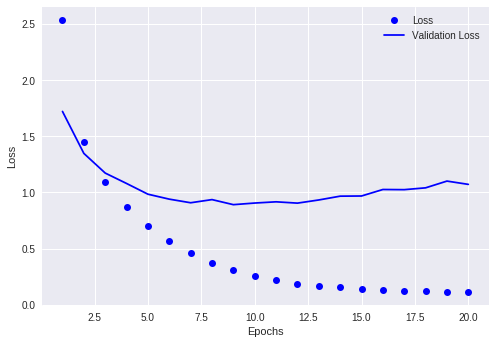

In [0]:
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'bo', label = "Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [0]:
model2 = models.Sequential()
model2.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(46, activation='softmax'))
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
history = model2.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data = (x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 228us/step - loss: 2.6149 - acc: 0.4919 - val_loss: 1.6850 - val_acc: 0.6100
Epoch 2/20
7982/7982 [==============================] - 1s 150us/step - loss: 1.4426 - acc: 0.6832 - val_loss: 1.3136 - val_acc: 0.6860
Epoch 3/20
7982/7982 [==============================] - 1s 152us/step - loss: 1.0892 - acc: 0.7632 - val_loss: 1.1334 - val_acc: 0.7480
Epoch 4/20
7982/7982 [==============================] - 1s 151us/step - loss: 0.8720 - acc: 0.8053 - val_loss: 1.0497 - val_acc: 0.7660
Epoch 5/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.6950 - acc: 0.8470 - val_loss: 0.9884 - val_acc: 0.7890
Epoch 6/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.5607 - acc: 0.8737 - val_loss: 0.9573 - val_acc: 0.7900
Epoch 7/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.4548 - acc: 0.8976 - val_loss: 0.9469 - val_acc: 0.8020


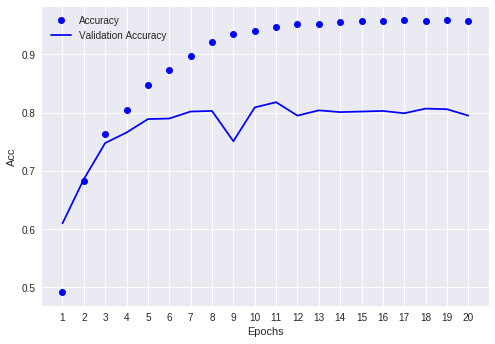

In [0]:
import matplotlib.pyplot as plt
epochs = range(1, len(history.history['acc']) + 1)
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label = "Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.xticks(np.arange(min(epochs), max(epochs)+1, 1.0))
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.show()

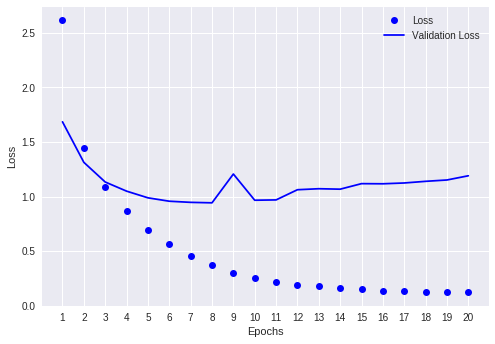

In [0]:
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'bo', label = "Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.xticks(np.arange(min(epochs), max(epochs)+1, 1.0))
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [0]:
model3 = models.Sequential()
model3.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(46, activation='softmax'))
model3.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
model3.fit(train_data, train_labels, epochs=8, batch_size=512)

Epoch 1/8
8982/8982 [==============================] - 2s 217us/step - loss: 2.3930 - acc: 0.5163
Epoch 2/8
8982/8982 [==============================] - 1s 158us/step - loss: 1.3422 - acc: 0.7076
Epoch 3/8
8982/8982 [==============================] - 2s 169us/step - loss: 1.0440 - acc: 0.7733
Epoch 4/8
8982/8982 [==============================] - 1s 166us/step - loss: 0.8374 - acc: 0.8153
Epoch 5/8
8982/8982 [==============================] - 1s 164us/step - loss: 0.6534 - acc: 0.8584
Epoch 6/8
8982/8982 [==============================] - 1s 166us/step - loss: 0.5337 - acc: 0.8850
Epoch 7/8
8982/8982 [==============================] - 1s 163us/step - loss: 0.4361 - acc: 0.9034
Epoch 8/8
8982/8982 [==============================] - 1s 164us/step - loss: 0.3383 - acc: 0.9250


In [0]:
loss, acc = model3.evaluate(test_data,test_labels)

2246/2246 [==============================] - 0s 137us/step


In [0]:
acc

0.7831700801424755

In [0]:
loss

1.00360224593036

In [0]:
results = model2.evaluate(test_data, test_labels)

2246/2246 [==============================] - 0s 121us/step


In [0]:
results

[1.0566404789341208, 0.7804986642920748]

In [0]:
test = model2.predict(test_data)

In [0]:
test[0]

array([2.52051359e-05, 3.44504151e-05, 1.73111209e-06, 8.84088159e-01,
       1.03352048e-01, 1.82001368e-05, 6.40692771e-04, 1.58407842e-04,
       1.12070213e-03, 4.90115872e-06, 6.05033711e-05, 2.58802180e-03,
       5.87944442e-06, 4.10645371e-05, 3.14656427e-05, 1.82870133e-06,
       2.21744296e-03, 3.34140786e-04, 3.66305794e-05, 5.15528140e-04,
       1.89520756e-03, 2.46305694e-06, 1.66324071e-06, 1.08246179e-03,
       1.48217723e-07, 1.49669911e-04, 2.18619289e-06, 1.16885414e-04,
       4.48962601e-05, 5.39066059e-05, 8.62011875e-05, 3.61946353e-04,
       5.53049867e-05, 8.48412128e-07, 4.86007821e-06, 3.08791641e-06,
       1.56282185e-04, 3.80572223e-04, 1.56344868e-05, 2.35425177e-04,
       5.82171333e-06, 1.85169192e-05, 1.72905384e-05, 2.56693165e-05,
       4.88724936e-06, 1.18467869e-06], dtype=float32)